## Demo for modelling dual-channel PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='biplane')

#### Edit user defined parameters

In [3]:
L.param.datapath = r'C:\Users\Sheng\Downloads\Data/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'rawData' # keyword of the file name or the full file name without extension
L.param.gain = 0.5
L.param.ccd_offset = 100
L.param.option.insitu.stage_pos = 0.5 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.roi.roi_size = [21,21]
L.param.batch_size = 500 # lower this number if out of memory
L.param.option.model.const_pupilmag = False
L.param.option.model.n_max = 6
L.param.option.insitu.repeat=3    
L.param.option.insitu.stage_tilt = [0,0] # tilt in [y,x], unit: nm/pixel 

#### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

C:\Users\Sheng\Downloads\Data\rawData.mat
(2, 1000, 256, 256)
rois shape channel 0: (8728, 21, 21)
rois shape channel 1: (9027, 21, 21)
rois shape channel 0: (7112, 21, 21)
rois shape channel 1: (7112, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.20s/it total time: 1.19s
5/6: localization: 3/3 [00:00s] 12.89it/s total time: 1.43s
3/6: learning: 55/100 [01:10s]  1.28s/it, current loss: 0.61015, total time: 70.40s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.21s/it total time: 71.59s
5/6: localization: 3/3 [00:00s] 15.88it/s total time: 71.78s
3/6: learning: 54/100 [01:08s]  1.27s/it, current loss: 0.64861, total time: 139.12s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.21s/it total time: 2.38s
5/6: localization: 3/3 [00:50s] 16.74s/it total time: 52.59s
c:\Users\Sheng\Documents\git\python\uiPSF\dev_fig\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 211/250 [03:02s]  1.16it/s, current loss: 1.16380, total time: 321.62s


outlier percentage: 0.24206815511163338
rois shape channel 0: (1290, 21, 21)
rois shape channel 1: (1290, 21, 21)


3/6: learning: 208/250 [02:13s]  1.56it/s, current loss: 1.14086, total time: 455.20s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.20s/it total time: 2.38s
5/6: localization: 3/3 [00:01s]  1.90it/s total time: 3.96s
6/6: saving results: [00:02s] total time: 6.45s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.24s/it total time: 1.22s
5/6: localization: 3/3 [00:00s]  7.44it/s total time: 1.63s
3/6: learning: 52/100 [01:07s]  1.29s/it, current loss: 0.60624, total time: 67.33s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.21s/it total time: 68.53s
5/6: localization: 3/3 [00:00s] 14.58it/s total time: 68.74s
3/6: learning: 55/100 [01:10s]  1.28s/it, current loss: 0.62307, total time: 137.83s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.19s/it total time: 2.36s
5/6: localization: 3/3 [00:57s] 19.25s/it total time: 60.10s
3/6: learning: 119/250 [01:40s]  1.18it/s, current loss: 1.16479, total time: 238.50s


outlier percentage: 0.24231370505471594
rois shape channel 0: (1454, 21, 21)
rois shape channel 1: (1454, 21, 21)


3/6: learning: 79/250 [00:50s]  1.57it/s, current loss: 1.14616, total time: 288.96s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.19s/it total time: 2.37s
5/6: localization: 3/3 [00:02s]  1.19it/s total time: 4.89s
6/6: saving results: [00:02s] total time: 7.35s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.21s/it total time: 1.20s
5/6: localization: 3/3 [00:00s]  7.94it/s total time: 1.57s
3/6: learning: 52/100 [01:06s]  1.27s/it, current loss: 0.61027, total time: 66.26s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.20s/it total time: 67.45s
5/6: localization: 3/3 [00:00s] 13.46it/s total time: 67.67s
3/6: learning: 52/100 [01:06s]  1.27s/it, current loss: 0.62046, total time: 132.33s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.18s/it total time: 2.35s
5/6: localization: 3/3 [00:47s] 16.00s/it total time: 50.34s
3/6: learning: 210/250 [02:56s]  1.19it/s, current loss: 1.15455, total time: 308.90s


outlier percentage: 0.24374374374374375
rois shape channel 0: (1511, 21, 21)
rois shape channel 1: (1511, 21, 21)


3/6: learning: 204/250 [02:54s]  1.17it/s, current loss: 1.13622, total time: 483.56s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.20s/it total time: 2.38s
5/6: localization: 3/3 [00:01s]  1.51it/s total time: 4.36s
6/6: saving results: [00:02s] total time: 6.81s


#### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

In [7]:
f.res.channel1.stagepos

array([0.50375694], dtype=float32)

channel 0


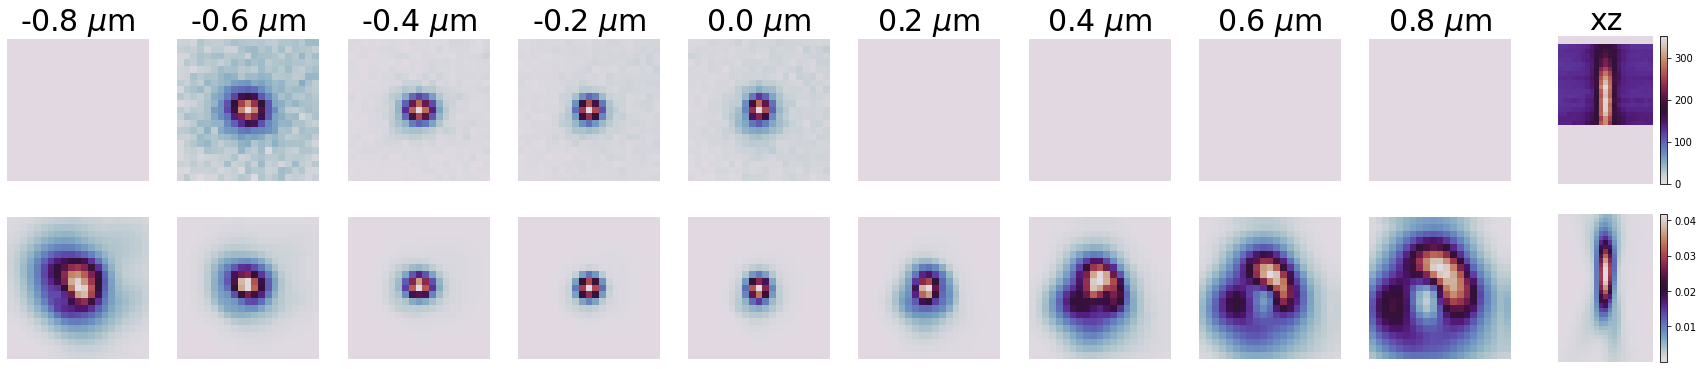

channel 1


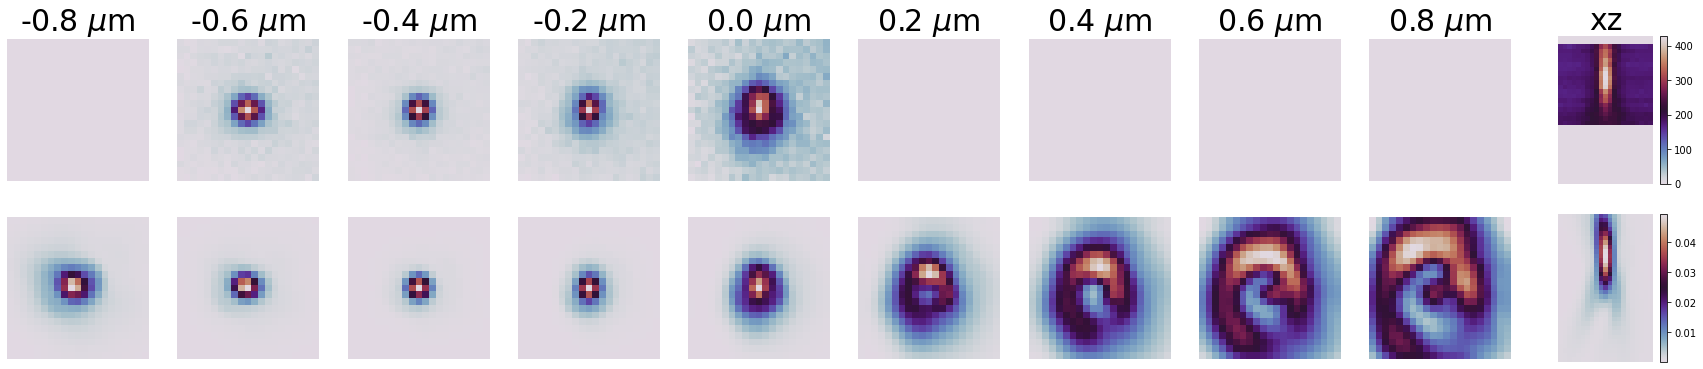

In [8]:
showpsfvsdata_insitu(f,p)

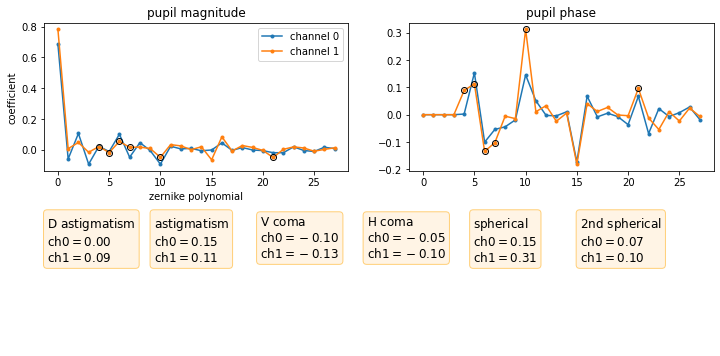

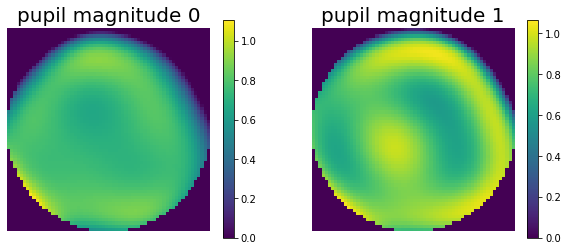

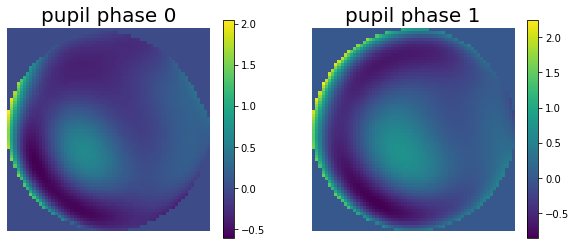

In [9]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

[[ 1.0047 -0.0098  0.    ]
 [ 0.0103  1.0051  0.    ]
 [-2.5862 -0.2428  1.    ]]


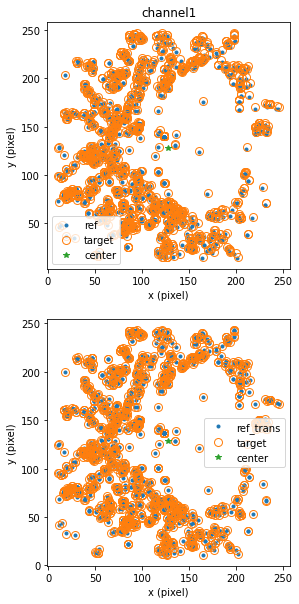

In [10]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

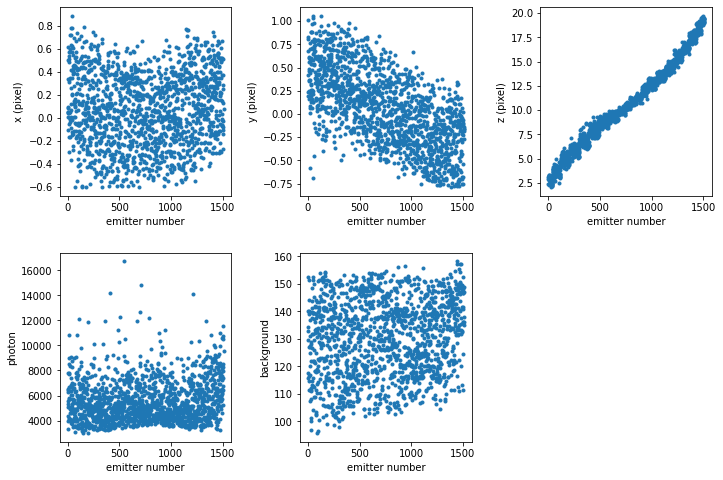

In [11]:
showlearnedparam_insitu(f,p)

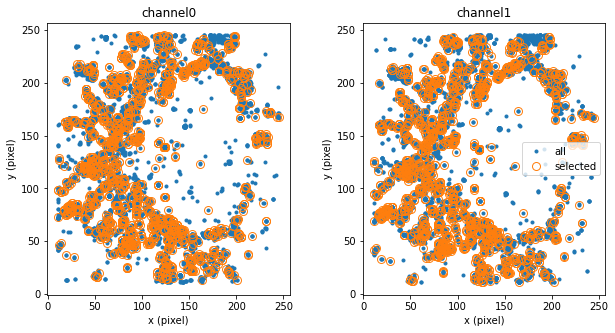

In [12]:
showcoord(f,p)

#### Ouput parameters

In [13]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
